Juliet Holmes mh3kh@virginia.edu

DS 5001

August 2022

# 2: NLP Annotated Standard Text Analytic Data Model (STADM)

The purpose of this notebook is to create DOC, LIB, CORPUS, and TOKENS tables at the F2 (STADM) and F3 (NLP annotated STADM) levels. 


---

dependencies: "wikipedia-DOC_v3.csv"

output: DOC.csv, LIB-F3.csv, CORPUS-F3.csv, TOKENS-F3.csv, SENTS-F3.csv, VOCAB-F3.csv

code files referenced: M01_03_first-foray.ipynb, M04_00_NLTK_Intro.ipynb, M04_01_Pipeline.ipynb

---
---

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import nltk

In [2]:
#nltk.download('stopwords')
from nltk.corpus import stopwords

#nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag

from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer

from nltk.stem import WordNetLemmatizer

# Prepare LIB table

In [3]:
LIB = pd.read_csv("wikipedia-DOC_v3.csv").set_index('doc_id')

In [4]:
LIB.shape

(4589, 7)

In [5]:
LIB.head()

,doc_title,doc_url,doc_summary,doc_content,categories,doc_summary_clean,doc_content_clean
doc_id,,,,,,,
0,Abstract data type,https://en.wikipedia.org/wiki/Abstract_data_type,"<p>In computer science, an <b>abstract data ty...","<p>In computer science, an <b>abstract data ty...",Abstract data types,"In computer science, an abstract data type (AD...","In computer science, an abstract data type (AD..."
1,Associative array,https://en.wikipedia.org/wiki/Associative_array,"<link rel=""mw-deduplicated-inline-style"" href=...","<link rel=""mw-deduplicated-inline-style"" href=...",Abstract data types,"In computer science, an associative array, ma...","In computer science, an associative array, ma..."
2,Augmented map,https://en.wikipedia.org/wiki/Augmented_map,"<p>In computer science, the <b>augmented map</...","<p>In computer science, the <b>augmented map</...",Abstract data types,"In computer science, the augmented map is an a...","In computer science, the augmented map is an a..."
3,Cardinal tree,https://en.wikipedia.org/wiki/Cardinal_tree,<p>A <b>cardinal tree</b> (or trie) of degree ...,<p>A <b>cardinal tree</b> (or trie) of degree ...,Abstract data types,"A cardinal tree (or trie) of degree k, by anal...","A cardinal tree (or trie) of degree k, by anal..."
4,Collection (abstract data type),https://en.wikipedia.org/wiki/Collection_(abst...,"<p>In computer programming, a <b>collection</b...","<p>In computer programming, a <b>collection</b...",Abstract data types,"In computer programming, a collection is a gro...","In computer programming, a collection is a gro..."


In [6]:
LIB.columns

Index(['doc_title', 'doc_url', 'doc_summary', 'doc_content', 'categories',
       'doc_summary_clean', 'doc_content_clean'],
      dtype='object')

In [7]:
LIB.doc_summary_clean[3]

'A cardinal tree (or trie) of degree k, by analogy with cardinal numbers and by opposition with ordinal trees, is a rooted tree in which each node has k positions for an edge to a child. Each node has up to k children and each child of a given node is labeled by a unique integer from the set {1, 2, . . . , k}. For instance, a binary tree is a cardinal tree of degree 2. '

In [8]:
LIB.categories.value_counts()

Data management                                296
Linear algebra                                 262
Information theory                             159
Machine learning                               153
Natural language processing                    149
                                              ... 
Exploratory data analysis|Plotting software      1
Bayesian statistics|Regression analysis          1
Logistic regression|Machine learning             1
Machine learning|Search algorithms               1
Graphical models|Markov models                   1
Name: categories, Length: 468, dtype: int64

# add separate columns for categories

categories = LIB["categories"].str.split('|', expand=True)

In [9]:
OHCO = ["doc_num", "sentence_num", "token_num", "token_str"] #doc_summary_clean == paragraph level

# DOC

In [10]:
DOC = LIB[['doc_title','doc_summary_clean']]

In [11]:
DOC.head()

,doc_title,doc_summary_clean
doc_id,,
0,Abstract data type,"In computer science, an abstract data type (AD..."
1,Associative array,"In computer science, an associative array, ma..."
2,Augmented map,"In computer science, the augmented map is an a..."
3,Cardinal tree,"A cardinal tree (or trie) of degree k, by anal..."
4,Collection (abstract data type),"In computer programming, a collection is a gro..."


In [12]:
DOC.columns

Index(['doc_title', 'doc_summary_clean'], dtype='object')

In [13]:
#DOC[OHCO[:1]]

# Sentence 

In [14]:
sent_pat = r'[.?!;:]+'
SENTS = DOC['doc_summary_clean'].str.split(sent_pat, expand=True).stack()\
    .to_frame('sent_str')


In [15]:
SENTS

sent_str
doc_id                                                     
0      0  In computer science, an abstract data type (AD...
       1   An abstract data type is defined by its behav...
       2   This mathematical model contrasts with data s...
       3   Formally, an ADT may be defined as a "class o...
       4   this is analogous to an algebraic structure i...
...                                                     ...
4589   0  The JavaScript InfoVis Toolkit provides tools ...
       1   The toolkit implements advanced features of i...
       2  In November 2010 the toolkit was acquired by t...
       3   Further development on the toolkit involves W...
       4   The JavaScript InfoVis Toolkit was chosen as ...

[37365 rows x 1 columns]

In [16]:
SENTS.index.names = OHCO[:2]

In [17]:
SENTS

sent_str
doc_num sentence_num                                                   
0       0             In computer science, an abstract data type (AD...
        1              An abstract data type is defined by its behav...
        2              This mathematical model contrasts with data s...
        3              Formally, an ADT may be defined as a "class o...
        4              this is analogous to an algebraic structure i...
...                                                                 ...
4589    0             The JavaScript InfoVis Toolkit provides tools ...
        1              The toolkit implements advanced features of i...
        2             In November 2010 the toolkit was acquired by t...
        3              Further development on the toolkit involves W...
        4              The JavaScript InfoVis Toolkit was chosen as ...

[37365 rows x 1 columns]

# Token table

In [18]:
token_pat = r"[\s',-]+"
TOKENS = SENTS['sent_str'].str.split(token_pat, expand=True).stack()\
    .to_frame('token_str')

In [19]:
TOKENS.head()

token_str
doc_num sentence_num            
0       0            0        In
                     1  computer
                     2   science
                     3        an
                     4  abstract

In [20]:
TOKENS.index

MultiIndex([(   0, 0,  0),
            (   0, 0,  1),
            (   0, 0,  2),
            (   0, 0,  3),
            (   0, 0,  4),
            (   0, 0,  5),
            (   0, 0,  6),
            (   0, 0,  7),
            (   0, 0,  8),
            (   0, 0,  9),
            ...
            (4589, 4, 10),
            (4589, 4, 11),
            (4589, 4, 12),
            (4589, 4, 13),
            (4589, 4, 14),
            (4589, 4, 15),
            (4589, 4, 16),
            (4589, 4, 17),
            (4589, 4, 18),
            (4589, 4, 19)],
           names=['doc_num', 'sentence_num', None], length=688299)

In [21]:
OHCO

['doc_num', 'sentence_num', 'token_num', 'token_str']

In [22]:
TOKENS.index.names = ['doc_num', 'sentence_num', 'token_num']

In [23]:
TOKENS

token_str
doc_num sentence_num token_num          
0       0            0                In
                     1          computer
                     2           science
                     3                an
                     4          abstract
...                                  ...
4589    4            15           Google
                     16           Summer
                     17               of
                     18             Code
                     19             2011

[688299 rows x 1 columns]

In [24]:
TOKENS.index.names

FrozenList(['doc_num', 'sentence_num', 'token_num'])

In [25]:
#add part of speech to token table Module 4 nltk

In [26]:
keep_whitespace = True

In [27]:
if keep_whitespace:
    TOKENS = SENTS.sent_str\
            .apply(lambda x: pd.Series(nltk.pos_tag(nltk.word_tokenize(x))))\
            .stack()\
            .to_frame('pos_tuple')
else:
    TOKENS = SENTS.sent_str\
            .apply(lambda x: pd.Series(nltk.pos_tag(nltk.WhitespaceTokenizer().tokenize(x))))\
            .stack()\
            .to_frame('pos_tuple')

<ipython-input-27-16793b5441ac>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  .apply(lambda x: pd.Series(nltk.pos_tag(nltk.word_tokenize(x))))\


In [28]:
TOKENS.columns

Index(['pos_tuple'], dtype='object')

In [29]:
TOKENS['pos'] = TOKENS.pos_tuple.apply(lambda x: x[1])
TOKENS['token_str'] = TOKENS.pos_tuple.apply(lambda x: x[0])
TOKENS['term_str'] = TOKENS.token_str.str.lower()

In [30]:
TOKENS.index.names = OHCO[:3]

In [31]:
TOKENS.head()

pos_tuple pos token_str  term_str
doc_num sentence_num token_num                                        
0       0            0                (In, IN)  IN        In        in
                     1          (computer, NN)  NN  computer  computer
                     2           (science, NN)  NN   science   science
                     3                  (,, ,)   ,         ,         ,
                     4                (an, DT)  DT        an        an

In [32]:
#clean up term string
TOKENS['term_str'] = TOKENS.token_str.replace(r'[\W_]+', '', regex=True).str.lower()

In [33]:
TOKENS

pos_tuple  pos token_str  term_str
doc_num sentence_num token_num                                         
0       0            0                (In, IN)   IN        In        in
                     1          (computer, NN)   NN  computer  computer
                     2           (science, NN)   NN   science   science
                     3                  (,, ,)    ,         ,          
                     4                (an, DT)   DT        an        an
...                                        ...  ...       ...       ...
4589    4            14          (Google, NNP)  NNP    Google    google
                     15          (Summer, NNP)  NNP    Summer    summer
                     16               (of, IN)   IN        of        of
                     17            (Code, NNP)  NNP      Code      code
                     18             (2011, CD)   CD      2011      2011

[703206 rows x 4 columns]

In [34]:
TOKENS.index.names = OHCO[:3]

# Create CORPUS table (as a copy of TOKENS table)

In [35]:
CORPUS = TOKENS

# Vocabulary

In [36]:
VOCAB = TOKENS.term_str.value_counts().to_frame('n')

#set term string as the index name
VOCAB.index.name = 'term_str'

In [37]:
VOCAB.head()

,n
term_str,
,64070
the,39172
of,25107
a,23260
is,17119


In [38]:
VOCAB

,n
term_str,
,64070
the,39172
of,25107
a,23260
is,17119
...,...
legitimately,1
plummet,1
narendra,1


In [39]:
#add number of characters
VOCAB['n_chars'] = VOCAB.index.str.len()

In [40]:
#probability
VOCAB['p'] = VOCAB.n / VOCAB.n.sum()

In [41]:
#surprisal
VOCAB['s'] = 1/VOCAB.p

In [42]:
#information
VOCAB['i'] = -np.log2(VOCAB.p)

In [43]:
#entropy
VOCAB['h'] = VOCAB.p * VOCAB.i

In [44]:
VOCAB

,n,n_chars,p,s,i,h
term_str,,,,,,
,64070,0,0.091111,10.975589,3.456226,0.314901
the,39172,3,0.055705,17.951751,4.166053,0.232069
of,25107,2,0.035704,28.008364,4.807786,0.171655
a,23260,1,0.033077,30.232416,4.918024,0.162674
is,17119,2,0.024344,41.077516,5.360277,0.130492
...,...,...,...,...,...,...
legitimately,1,12,0.000001,703206.000000,19.423588,0.000028
plummet,1,7,0.000001,703206.000000,19.423588,0.000028
narendra,1,8,0.000001,703206.000000,19.423588,0.000028


## Vocabulary: annotate
Calculate most frequntly associated part of speach category for each word

In [45]:
VOCAB['max_pos'] = TOKENS[['term_str','pos']].value_counts().unstack(fill_value=0).idxmax(1) #add max part of speech

In [46]:
VOCAB

,n,n_chars,p,s,i,h,max_pos
term_str,,,,,,,
,64070,0,0.091111,10.975589,3.456226,0.314901,","
the,39172,3,0.055705,17.951751,4.166053,0.232069,DT
of,25107,2,0.035704,28.008364,4.807786,0.171655,IN
a,23260,1,0.033077,30.232416,4.918024,0.162674,DT
is,17119,2,0.024344,41.077516,5.360277,0.130492,VBZ
...,...,...,...,...,...,...,...
legitimately,1,12,0.000001,703206.000000,19.423588,0.000028,RB
plummet,1,7,0.000001,703206.000000,19.423588,0.000028,VB
narendra,1,8,0.000001,703206.000000,19.423588,0.000028,NNP


## Vocabulary: Compute part of speech ambiguity 

In [47]:
#number of unique part of speech tags
VOCAB['n_pos'] = TOKENS[['term_str','pos']].value_counts().unstack().count(1)

#define part of speach category
VOCAB['cat_pos'] = TOKENS[['term_str','pos']].value_counts().to_frame('n').reset_index()\
    .groupby('term_str').pos.apply(lambda x: set(x))


In [48]:
VOCAB.head()

,n,n_chars,p,s,i,h,max_pos,n_pos,cat_pos
term_str,,,,,,,,,
,64070,0,0.091111,10.975589,3.456226,0.314901,",",31,"{VBN, ,, (, NN, VBD, FW, NNP, POS, NNS, $, UH,..."
the,39172,3,0.055705,17.951751,4.166053,0.232069,DT,3,"{RBR, CD, DT}"
of,25107,2,0.035704,28.008364,4.807786,0.171655,IN,1,{IN}
a,23260,1,0.033077,30.232416,4.918024,0.162674,DT,5,"{NNP, DT, NN, EX, VB}"
is,17119,2,0.024344,41.077516,5.360277,0.130492,VBZ,2,"{NNP, VBZ}"


## Vocab: Add stop words

In [49]:
#use NLTK stopword list
stopwords = nltk.corpus.stopwords.words('english')

In [50]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [51]:
my_seq = list(range(0,501, 1))

#convert elements to string
my_seq_str = [str(i) for i in my_seq]

In [52]:
my_stopwords = ["00", "000"]

In [55]:
#my stopwords


#extend add my stopwords to NLTK stopword list
stopwords.extend(my_seq_str + my_stopwords)

In [56]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [57]:
len(stopwords)

682

In [58]:
sw = pd.DataFrame(stopwords, columns=['term_str'])
sw = sw.reset_index().set_index('term_str')
sw.columns = ['dummy']
sw.dummy = 1

In [59]:
sw

,dummy
term_str,
i,1
me,1
my,1
myself,1
we,1
...,...
498,1
499,1
500,1


In [60]:
VOCAB['stop'] = VOCAB.index.map(sw.dummy)
VOCAB['stop'] = VOCAB['stop'].fillna(0).astype('int')

In [61]:
VOCAB.query("stop==0").head(50)

,n,n_chars,p,s,i,h,max_pos,n_pos,cat_pos,stop
term_str,,,,,,,,,,
,64070,0,0.091111,10.975589,3.456226,0.314901,",",31,"{VBN, ,, (, NN, VBD, FW, NNP, POS, NNS, $, UH,...",0
data,4886,4,0.006948,143.922636,7.169150,0.049813,NNS,10,"{NNP, NNS, VBN, JJ, VBP, VBZ, NN, VB, FW, RB}",0
used,2583,4,0.003673,272.243902,8.088756,0.029711,VBN,3,"{JJ, VBN, VBD}",0
x,1882,1,0.002676,373.648247,8.545537,0.022871,NNP,22,"{VBN, NN, VBD, FW, NNP, NNS, $, UH, DT, PRP, V...",0
distribution,1861,12,0.002646,377.864589,8.561726,0.022658,NN,2,"{NNP, NN}",0
also,1856,4,0.002639,378.882543,8.565607,0.022608,RB,1,{RB},0
function,1744,8,0.002480,403.214450,8.655404,0.021466,NN,5,"{NNP, JJ, VBP, NN, VB}",0
one,1728,3,0.002457,406.947917,8.668700,0.021302,CD,5,"{NNP, PRP, JJ, NN, CD}",0
information,1618,11,0.002301,434.614339,8.763592,0.020164,NN,2,"{NNP, NN}",0


#### Vocab: Stopword Stats

In [63]:
a = VOCAB.groupby('stop').n_chars.mean()
b = VOCAB.groupby('stop').n_pos.mean().sort_values(ascending=False)

In [64]:
pd.concat([a,b], 1)

,n_chars,n_pos
stop,,
0,8.167836,1.352443
1,2.943144,1.812709


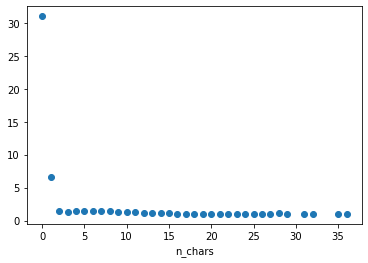

In [65]:
VOCAB.groupby('n_chars').n_pos.mean()\
    .sort_values(ascending=False).plot(style='o');

## Vocab: Add stems

In [66]:
stemmer1 = PorterStemmer()
VOCAB['stem_porter'] = VOCAB.apply(lambda x: stemmer1.stem(x.name), 1)

stemmer2 = SnowballStemmer("english")
VOCAB['stem_snowball'] = VOCAB.apply(lambda x: stemmer2.stem(x.name), 1)

stemmer3 = LancasterStemmer()
VOCAB['stem_lancaster'] = VOCAB.apply(lambda x: stemmer3.stem(x.name), 1)


In [67]:
VOCAB

,n,n_chars,p,s,i,h,max_pos,n_pos,cat_pos,stop,stem_porter,stem_snowball,stem_lancaster
term_str,,,,,,,,,,,,,
,64070,0,0.091111,10.975589,3.456226,0.314901,",",31,"{VBN, ,, (, NN, VBD, FW, NNP, POS, NNS, $, UH,...",0,,,
the,39172,3,0.055705,17.951751,4.166053,0.232069,DT,3,"{RBR, CD, DT}",1,the,the,the
of,25107,2,0.035704,28.008364,4.807786,0.171655,IN,1,{IN},1,of,of,of
a,23260,1,0.033077,30.232416,4.918024,0.162674,DT,5,"{NNP, DT, NN, EX, VB}",1,a,a,a
is,17119,2,0.024344,41.077516,5.360277,0.130492,VBZ,2,"{NNP, VBZ}",1,is,is,is
...,...,...,...,...,...,...,...,...,...,...,...,...,...
legitimately,1,12,0.000001,703206.000000,19.423588,0.000028,RB,1,{RB},0,legitim,legitim,legitim
plummet,1,7,0.000001,703206.000000,19.423588,0.000028,VB,1,{VB},0,plummet,plummet,plummet
narendra,1,8,0.000001,703206.000000,19.423588,0.000028,NNP,1,{NNP},0,narendra,narendra,narendr


## Vocab: Add lemmatization

In [68]:
lemmatizer = WordNetLemmatizer()
VOCAB['lemma'] = VOCAB.apply(lambda x: lemmatizer.lemmatize(x.name), 1)

In [69]:
VOCAB

,n,n_chars,p,s,i,h,max_pos,n_pos,cat_pos,stop,stem_porter,stem_snowball,stem_lancaster,lemma
term_str,,,,,,,,,,,,,,
,64070,0,0.091111,10.975589,3.456226,0.314901,",",31,"{VBN, ,, (, NN, VBD, FW, NNP, POS, NNS, $, UH,...",0,,,,
the,39172,3,0.055705,17.951751,4.166053,0.232069,DT,3,"{RBR, CD, DT}",1,the,the,the,the
of,25107,2,0.035704,28.008364,4.807786,0.171655,IN,1,{IN},1,of,of,of,of
a,23260,1,0.033077,30.232416,4.918024,0.162674,DT,5,"{NNP, DT, NN, EX, VB}",1,a,a,a,a
is,17119,2,0.024344,41.077516,5.360277,0.130492,VBZ,2,"{NNP, VBZ}",1,is,is,is,is
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
legitimately,1,12,0.000001,703206.000000,19.423588,0.000028,RB,1,{RB},0,legitim,legitim,legitim,legitimately
plummet,1,7,0.000001,703206.000000,19.423588,0.000028,VB,1,{VB},0,plummet,plummet,plummet,plummet
narendra,1,8,0.000001,703206.000000,19.423588,0.000028,NNP,1,{NNP},0,narendra,narendra,narendr,narendra


# Save

In [70]:
LIB.to_csv('LIB-F3.csv')
VOCAB.to_csv('VOCAB-F3.csv')


SENTS.to_csv('SENTS-F3.csv')


In [71]:
DOC.to_csv("DOC.csv")

In [72]:
CORPUS.to_csv("CORPUS-F3.csv")

In [73]:
TOKENS.to_csv("TOKENS-F3.csv")